<h1>Dataset: Marketing</h1>

<h3>Instalacion</h3>

In [28]:

%pip install pip install numpy matplotlib scikit-learn sklearn graphviz mglearn cycler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import mglearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

244.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


1. Identificar el tipo/clase de problema.

2. Identificar las variables y sus características. Describirlas.

<h3>Lectura de dataset</h3>

In [29]:
# leyendo el dataset
df = pd.read_csv("./Marketing.csv", sep=";")

print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [30]:
print(df.size)

864948


3. Realizar la tarea de preprocesamiento en caso de que fuese necesario. Limpieza de variables, normalización, categorización, remuestreo, binarización, categorización, etc.

In [31]:
# dropeo registros duplicados
print(df.size)
df.drop_duplicates(keep="last", inplace=True)
print(df.size)

864948
864696


In [32]:
df.shape
df.select_dtypes('object').info()
df = df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   poutcome     41176 non-null  object
 10  y            41176 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


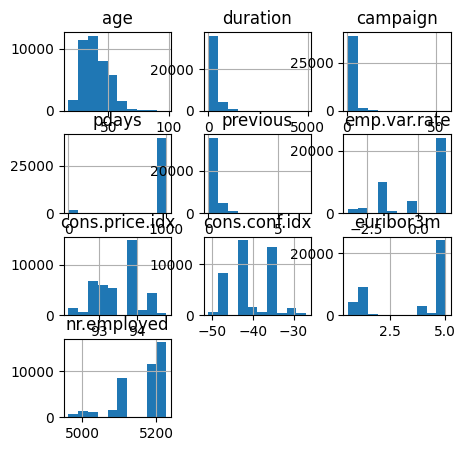

In [33]:

df.hist(figsize=(5, 5))
plt.show()

In [34]:
df.dtypes
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [35]:
# PRE PROCESAMIENTO
from sklearn.model_selection import train_test_split
# Dummies para acomodar la data string a int
df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"])
X_train, X_test, y_train, y_test = train_test_split(df, df, random_state=1)
print(X_train.shape)
print(X_test.shape)

X_train

(30882, 65)
(10294, 65)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
8663,35,134,2,999,0,1.4,94.465,-41.8,4.864,5228.1,...,0,0,0,0,1,0,1,0,1,0
25725,32,405,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,...,0,0,0,0,1,0,1,0,1,0
38608,35,75,2,999,0,-3.4,92.649,-30.1,0.722,5017.5,...,0,1,0,0,0,0,1,0,1,0
31458,36,239,2,999,0,-1.8,92.893,-46.2,1.334,5099.1,...,0,0,0,0,1,0,1,0,1,0
7990,40,158,1,999,0,1.4,94.465,-41.8,4.865,5228.1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,60,526,2,999,0,1.4,94.465,-41.8,4.865,5228.1,...,0,1,0,0,0,0,1,0,0,1
32521,29,340,2,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,1,0,0,1,0
5193,35,14,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
12173,38,110,2,999,0,1.4,93.918,-42.7,4.955,5228.1,...,0,0,0,1,0,0,1,0,1,0


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [37]:


#el método fit calcula el mínimo y máximo del training set
scaler.fit(X_train)

MinMaxScaler()

In [38]:
# hace la efectiva transformación de datos
X_train_scaled = scaler.transform(X_train)
# imprimir datos antes y despues de escalar
print("transformed shape: {}".format(X_train_scaled.shape))
print("mínimo por característica antes de escalar:\n {}".format(X_train.min(axis=0)))
print("máximo por característica antes de escalar:\n {}".format(X_train.max(axis=0)))
print("mínimo por característica después de escalar:\n {}".format(
    X_train_scaled.min(axis=0)))
print("máximo por característica después de escalar:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (30882, 65)
mínimo por característica antes de escalar:
 age                     17.0
duration                 0.0
campaign                 1.0
pdays                    0.0
previous                 0.0
                        ... 
poutcome_failure         0.0
poutcome_nonexistent     0.0
poutcome_success         0.0
y_no                     0.0
y_yes                    0.0
Length: 65, dtype: float64
máximo por característica antes de escalar:
 age                       98.0
duration                4199.0
campaign                  43.0
pdays                    999.0
previous                   6.0
                         ...  
poutcome_failure           1.0
poutcome_nonexistent       1.0
poutcome_success           1.0
y_no                       1.0
y_yes                      1.0
Length: 65, dtype: float64
mínimo por característica después de escalar:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

4. Aplicar al menos tres (3) modelos de Machine Learning distintos para el problema identificado.
    a. Formalizar una técnica de selección de los datos.
    b. Evaluar cada modelo según los resultados obtenidos.
    c. Comentar las ventajas y limitación de los modelos elegidos.
    
- Los tres modelos que elegimos son:
    1) Regresion Logistica
    2) Random Forest
    3)

1) Regresion Logistica

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

x = df.values
y = df.values

# Spliteo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 321)

# sklearn -> StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 12, solver = 'saga')
lr.fit(x_train, y_train)

print('Precision Entrenamiento: {lr.score(x_train, y_train)}')
print('Precision Test: {lr.score(x_test, y_test)}')

ValueError: y should be a 1d array, got an array of shape (32940, 65) instead.

2) Random Forest

In [ ]:
params = {
    'n_estimators': [200],
    'max_features': [40, 50],
    'mex_depth': [10, 25],
    'criterion': ['entropy', 'gini'],
}

grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 123),
    params = params,
    scoring = 'accuracy',
    jobs = multiprocessing.cpu_count() - 1,
    cv = RepeatedKFold(splits = 5, repeats = 3, random = 123),
    refit = True,
    verbose = 0,
    return_train_score = True
)

grid.fit(x = x_train, y = y_train)

# Score
score = pd.DataFrame(grid.cv_results_)
# score.filter()   - Falta filtrar